In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import cv2
import glob

import tensorflow as tf

import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

2023-05-09 18:01:31.090405: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 18:01:32.892702: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sac0380/miniconda3/lib/python3.10/site-packages/cv2/../../lib64:
2023-05-09 18:01:32.892751: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sac0380/miniconda3/lib/python3.10/site-packages/cv2/.

## Loading Model

In [2]:
model = tf.keras.models.load_model("leaf_area_segmented.h5")

2023-05-09 18:01:36.768570: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-09 18:01:36.790725: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-09 18:01:36.790870: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-09 18:01:36.791198: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

## Segmenting Milkweed Images

In [3]:
# import tqdm
# import torch
# from segment_anything import SamAutomaticMaskGenerator, sam_model_registry

# DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# sam = sam_model_registry["vit_h"](checkpoint="segmentation/sam_vit_h_4b8939.pth").to(device=DEVICE)
# mask_generator = SamAutomaticMaskGenerator(sam)

# k = -1
# for file in glob.glob("milkweed/images/*"):

#     k+=1

#     fig = plt.figure(figsize=(2.8,2.8))
#     image = cv2.imread(file)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     masks = mask_generator.generate(image)  

#     mask_final = np.zeros((image.shape[0],image.shape[1]))
#     for mask in masks:
#         seg = np.array(mask['segmentation'])*1

#         mask_final += seg
#     mask_final = np.where(mask_final>1,1,0)
#     for i in range(3):
#         image[:, :, i] = image[:, :, i] * mask_final
#     plt.imshow(image)
#     plt.axis('off')
#     plt.savefig("milkweed/segs2/"+str(k)+".jpg", bbox_inches='tight')
#     plt.close()


## Predicting and Analyzing Values

In [4]:
value = []
for image in sorted(glob.glob("milkweed/segs2/*.jpg")):
    img = cv2.imread(image)
    img = cv2.resize(img, (224,224))
    img = np.expand_dims(img, axis=0)
    print(img.shape)
    value.append(model.predict(img))

(1, 224, 224, 3)


2023-05-09 18:01:44.446225: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8901


1/1 [==============================] - 2s 2s/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 26ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 17ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 17ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 16ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 17ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 17ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 17ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 16ms/step
(1, 224, 224, 3)
1/1 [==============================] - 0s 16ms/step


In [7]:
import pickle

with open('leaf.pkl', 'rb') as fp:
    y_mean = pickle.load(fp)

In [8]:
max = np.amax(y_mean)
min = np.amin(y_mean)

for i in value:
    #print(((i + 1) / 2))
    print(((i + 1) / 2) * (max - min) +min)

[[3176.5432]]
[[2451.5818]]
[[16665.795]]
[[5411.6196]]
[[2707.5305]]
[[3374.252]]
[[5547.557]]
[[4352.7715]]
[[4234.1855]]
[[3146.9297]]


In [10]:
data = pd.read_csv('TRY_final.txt', sep=',', encoding='latin-1')
data = data[data['mean_3110'].notna()]
data.head()

,AccSpeciesName,mean_14,mean_3117,mean_3106,mean_4,mean_3110,mean_26,stddev_14,stddev_3117,stddev_3106,stddev_4,stddev_3110,stddev_26,PlantGrowthForm
3,Abarema adenophora,24.422045,11.820481,NaN,0.663459,56861.990000,NaN,1.593152,1.030987,NaN,0.132959,NaN,NaN,tree
11,Abarema macradenia,23.394909,8.319237,31.670558,0.438332,16535.000000,90.000000,0.000000,0.129421,0.679612,0.000000,0.0,0.000000,tree
29,Abies alba,13.095739,7.846480,47.975610,0.499512,18.921429,70.544591,2.731756,2.738197,15.637276,0.076731,NaN,26.875742,tree
31,Abies balsamea,14.619919,16.226192,4.047670,0.457618,34.202755,7.473453,3.278028,6.272770,6.972198,0.093733,NaN,3.054439,tree
48,Abies fraseri,18.077778,5.566903,20.138400,NaN,22.801836,7.202712,3.111181,0.451749,5.774298,NaN,NaN,0.928773,tree


In [11]:
data.loc[data['AccSpeciesName'] == 'Asclepias syriaca', 'mean_3110'].values[0]

6370.15855555556

## Explainability

In [24]:
explainer = lime_image.LimeImageExplainer()

exp = explainer.explain_instance(cv2.imread("milkweed/segs2/3.jpg"), model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 17ms/step


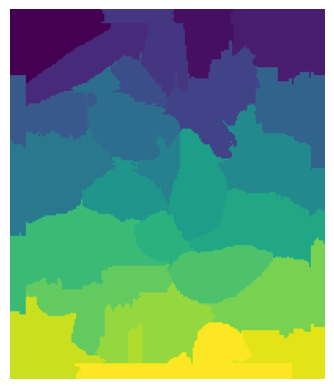

In [25]:
plt.imshow(exp.segments)
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


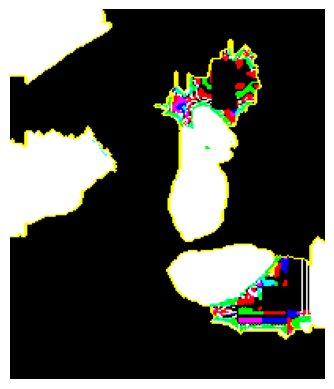

In [26]:
def generate_prediction_sample(exp, exp_class, weight = 0.00001, show_positive = True, hide_background = True):
    '''
    Method to display and highlight super-pixels used by the black-box model to make predictions
    '''
    image, mask = exp.get_image_and_mask(exp_class, positive_only=show_positive, num_features=6, hide_rest=hide_background,min_weight=weight)
    plt.imshow(mark_boundaries(image, mask))
    plt.axis('off')
    plt.show()
generate_prediction_sample(exp, exp.top_labels[0], show_positive = True, hide_background = True)

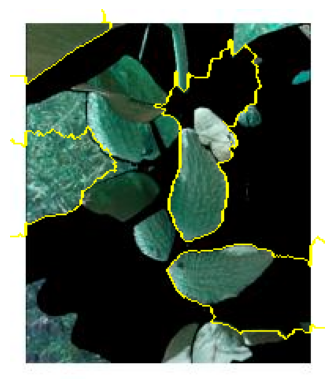

In [27]:
generate_prediction_sample(exp, exp.top_labels[0], show_positive = True, hide_background = False)

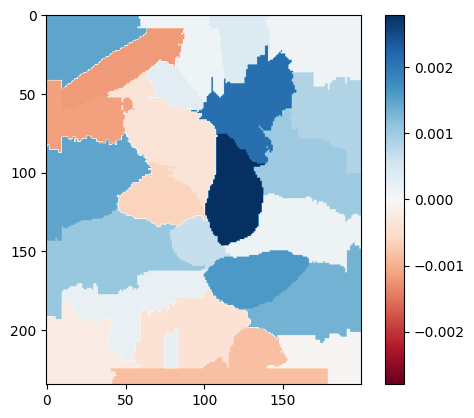

In [28]:
def explanation_heatmap(exp, exp_class):
    '''
    Using heat-map to highlight the importance of each super-pixel for the model prediction
    '''
    dict_heatmap = dict(exp.local_exp[exp_class])
    heatmap = np.vectorize(dict_heatmap.get)(exp.segments) 
    plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
    plt.colorbar()
    plt.show()

explanation_heatmap(exp, exp.top_labels[0])